In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargar datos
df = pd.read_csv("./../data/final/jugadores_porteros.csv")

In [4]:
print("🔢 Número de filas y columnas:", df.shape)
print("\n📋 Columnas relevantes:")
print(df[["Player", "position", "Age", "club", "Season", "mv_millions"]].head())

🔢 Número de filas y columnas: (545, 205)

📋 Columnas relevantes:
                  Player    position   Age                club     Season  \
0       Jasper Cillessen  Goalkeeper  28.0        FC Barcelona  2017/2018   
1  Marc-André ter Stegen  Goalkeeper  25.0        FC Barcelona  2017/2018   
2            Axel Werner  Goalkeeper  21.0  Atlético de Madrid  2017/2018   
3              Jan Oblak  Goalkeeper  24.0  Atlético de Madrid  2017/2018   
4      Miguel Ángel Moyá  Goalkeeper  33.0  Atlético de Madrid  2017/2018   

   mv_millions  
0          9.0  
1         60.0  
2          1.0  
3         70.0  
4          2.0  


In [9]:
nulos = df.isnull().sum()
print("\n❗ Columnas con más nulos:")
print(nulos[nulos > 0].sort_values(ascending=False).head(50))


❗ Columnas con más nulos:
Standard_G/SoT              538
Standard_G/Sh               525
Standard_SoT%               525
Standard_Dist               525
Expected_npxG/Sh            525
Subs_Mn/Sub                 490
Take-Ons_Tkld%              472
Take-Ons_Succ%              472
Challenges_Tkl%             362
Penalty Kicks_Save%         323
Aerial Duels_Won%           305
Performance_CS%             240
Team Success (xG)_On-Off    237
Team Success_On-Off         237
Short_Cmp%                  236
Starts_Mn/Start             232
Sweeper_AvgDist             232
Sweeper_#OPA                231
Performance_W               231
Performance_Save%           231
Goals_FK                    231
Expected_/90                231
Goals_CK                    231
Goals_OG                    231
Expected_PSxG+/-            231
Goals_PKA                   231
Penalty Kicks_PKatt         231
Penalty Kicks_PKsv          231
Penalty Kicks_PKA           231
Penalty Kicks_PKm           231
Performance_C

In [16]:
# Calcular porcentaje de nulos por columna
null_percent = df.isna().mean() * 100

# Definir rangos de porcentaje
rangos = [
    (90, 100),
    (80, 90),
    (70, 80),
    (60, 70),
    (50, 60),
    (40, 50),
    (30, 40),
    (20, 30),
    (10, 20),
    (1, 10),
    (0, 1)
]

# Crear diccionario con columnas clasificadas por rango
nulos_por_rango = {}

for lower, upper in rangos:
    columnas_en_rango = null_percent[(null_percent > lower) & (null_percent <= upper)].index.tolist()
    key = f"{int(lower)}% - {int(upper)}%"
    nulos_por_rango[key] = columnas_en_rango

# Mostrar los resultados
for rango, columnas in nulos_por_rango.items():
    print(f"\n📁 Columnas con nulos en el rango {rango} ({len(columnas)} columnas):")
    print(columnas)



📁 Columnas con nulos en el rango 90% - 100% (0 columnas):
[]

📁 Columnas con nulos en el rango 80% - 90% (0 columnas):
[]

📁 Columnas con nulos en el rango 70% - 80% (0 columnas):
[]

📁 Columnas con nulos en el rango 60% - 70% (0 columnas):
[]

📁 Columnas con nulos en el rango 50% - 60% (2 columnas):
['Penalty Kicks_Save%', 'Aerial Duels_Won%']

📁 Columnas con nulos en el rango 40% - 50% (164 columnas):
['Playing Time_Min', 'Expected_xG', 'Expected_npxG', 'Expected_xAG', 'Expected_npxG+xAG', 'Progression_PrgC', 'Progression_PrgP', 'Progression_PrgR', 'Per 90 Minutes_Gls', 'Per 90 Minutes_Ast', 'Per 90 Minutes_G+A', 'Per 90 Minutes_G-PK', 'Per 90 Minutes_G+A-PK', 'Per 90 Minutes_xG', 'Per 90 Minutes_xAG', 'Per 90 Minutes_xG+xAG', 'Per 90 Minutes_npxG', 'Per 90 Minutes_npxG+xAG', 'Performance_GA', 'Performance_GA90', 'Performance_SoTA', 'Performance_Saves', 'Performance_Save%', 'Performance_W', 'Performance_D', 'Performance_L', 'Performance_CS', 'Performance_CS%', 'Penalty Kicks_PKatt',

In [14]:
# Eliminar columnas con más del 90% de nulos
umbral = 0.6
columnas_muy_nulas = df.columns[df.isna().mean() > umbral]
df.drop(columns=columnas_muy_nulas, inplace=True)


In [33]:
# 🧤 Columnas importantes para porteros (sacadas de FBref y presentes en tu dataset)
columnas_porteros = [
    # Goalkeeping
    'Playing Time_MP', 'Playing Time_Min', 'Playing Time_90s',
    'MP', '90s', 'Performance_GA', 'Performance_GA90', 'Performance_SoTA',
    'Performance_Saves', 'Performance_Save%', 'Performance_W', 'Performance_D', 'Performance_L',
    'Performance_CS', 'Performance_CS%',
    'Penalty Kicks_PKatt', 'Penalty Kicks_PKA', 'Penalty Kicks_PKsv', 'Penalty Kicks_PKm',
    
    # Advanced Goalkeeping
    'Expected_PSxG', 'Expected_PSxG/SoT', 'Expected_PSxG+/-',
    'Expected_/90',  # PSxG/90
    'Launched_Cmp', 'Launched_Att', 'Launched_Cmp%',
    'Passes_Att (GK)', 'Passes_Thr', 'Passes_Launch%', 'Passes_AvgLen',
    'Goal Kicks_Att', 'Goal Kicks_Launch%', 'Goal Kicks_AvgLen',
    'Crosses_Opp', 'Crosses_Stp', 'Crosses_Stp%',
    'Sweeper_#OPA', 'Sweeper_#OPA/90', 'Sweeper_AvgDist'
]

# 📌 Filtramos las columnas que sí están en el dataset
columnas_validas = [col for col in columnas_porteros if col in df.columns]

# 🧹 Creamos un DataFrame reducido con esas columnas
df_porteros_clean = df[['Player', 'Season', 'position', 'Age', 'Nation', 'club', 'mv_millions'] + columnas_validas].copy()

# 🛠️ Rellenamos los nulos SOLO en columnas relevantes de porteros
df_porteros_clean[columnas_validas] = df_porteros_clean[columnas_validas].fillna(0)

# 🔎 Comprobación rápida
print(f"✅ Columnas finales: {df_porteros_clean.shape[1]}")
print(f"👤 Número de porteros: {df_porteros_clean.shape[0]}")
df_porteros_clean.head(20)


✅ Columnas finales: 46
👤 Número de porteros: 545


,Player,Season,position,Age,Nation,club,mv_millions,Playing Time_MP,Playing Time_Min,Playing Time_90s,...,Passes_AvgLen,Goal Kicks_Att,Goal Kicks_Launch%,Goal Kicks_AvgLen,Crosses_Opp,Crosses_Stp,Crosses_Stp%,Sweeper_#OPA,Sweeper_#OPA/90,Sweeper_AvgDist
0,Jasper Cillessen,2017/2018,Goalkeeper,28.0,NED,FC Barcelona,9.00,1.0,90.0,1.0,...,27.9,10.0,10.0,30.4,7.0,0.0,0.0,0.0,0.00,7.7
1,Marc-André ter Stegen,2017/2018,Goalkeeper,25.0,GER,FC Barcelona,60.00,37.0,3330.0,37.0,...,27.5,262.0,46.6,41.7,404.0,15.0,3.7,41.0,1.11,15.1
2,Axel Werner,2017/2018,Goalkeeper,21.0,ARG,Atlético de Madrid,1.00,1.0,90.0,1.0,...,51.2,7.0,100.0,56.4,16.0,1.0,6.3,1.0,1.00,13.5
3,Jan Oblak,2017/2018,Goalkeeper,24.0,SVN,Atlético de Madrid,70.00,37.0,3330.0,37.0,...,42.4,275.0,79.3,53.8,534.0,25.0,4.7,13.0,0.35,11.9
4,Miguel Ángel Moyá,2017/2018,Goalkeeper,33.0,ESP,Atlético de Madrid,2.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
5,Miguel Ángel Moyá,2017/2018,Goalkeeper,33.0,ESP,Real Sociedad,2.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
6,Keylor Navas,2017/2018,Goalkeeper,30.0,CRC,Real Madrid,18.00,27.0,2430.0,27.0,...,30.3,163.0,55.2,46.4,309.0,12.0,3.9,31.0,1.15,16.0
7,Kiko Casilla,2017/2018,Goalkeeper,30.0,ESP,Real Madrid,6.00,10.0,900.0,10.0,...,31.0,72.0,45.8,41.3,118.0,4.0,3.4,5.0,0.50,13.3
8,Luca Zidane,2017/2018,Goalkeeper,19.0,FRA,Real Madrid,0.30,1.0,90.0,1.0,...,24.8,8.0,12.5,27.9,7.0,2.0,28.6,0.0,0.00,10.5
9,Jaume Doménech,2017/2018,Goalkeeper,26.0,ESP,Valencia CF,2.50,5.0,450.0,5.0,...,29.2,34.0,61.8,48.8,81.0,2.0,2.5,3.0,0.60,11.9


In [34]:
print("\n📊 3. Información general")
display(df_porteros_clean.describe(include="all").transpose())


📊 3. Información general


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Player,545,199,Iván Villar,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Season,545,8,2024/2025,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
position,545,1,Goalkeeper,545,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,542.0,NaN,NaN,NaN,25.317343,5.417746,16.0,21.0,24.0,29.0,41.0
Nation,542,34,ESP,392,NaN,NaN,NaN,NaN,NaN,NaN,NaN
club,545,29,Celta de Vigo,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mv_millions,545.0,NaN,NaN,NaN,5.045963,11.8505,0.0,0.2,0.8,4.0,100.0
Playing Time_MP,545.0,NaN,NaN,NaN,10.073394,13.487403,0.0,0.0,2.0,20.0,38.0
Playing Time_Min,545.0,NaN,NaN,NaN,906.148624,1208.999443,0.0,0.0,180.0,1781.0,3420.0
Playing Time_90s,545.0,NaN,NaN,NaN,10.068991,13.432792,0.0,0.0,2.0,19.8,38.0


📊 Correlaciones con 'mv_millions':

mv_millions            1.000000
Performance_W          0.759245
Performance_CS         0.717394
Passes_Thr             0.581361
90s                    0.563958
Playing Time_MP        0.563095
Playing Time_90s       0.562352
Playing Time_Min       0.562335
Passes_Att (GK)        0.534415
Performance_Saves      0.504612
Crosses_Opp            0.499976
Goal Kicks_Att         0.493056
Performance_SoTA       0.471227
Crosses_Stp            0.467061
Performance_D          0.466386
Expected_PSxG          0.430925
Performance_CS%        0.420593
MP                     0.419238
Sweeper_#OPA           0.418598
Performance_GA         0.389557
Launched_Att           0.380276
Expected_PSxG+/-       0.378873
Launched_Cmp           0.371435
Performance_Save%      0.368979
Penalty Kicks_PKatt    0.354525
Launched_Cmp%          0.343113
Penalty Kicks_PKA      0.331435
Sweeper_AvgDist        0.320895
Penalty Kicks_PKsv     0.269149
Goal Kicks_AvgLen      0.256704
Perf

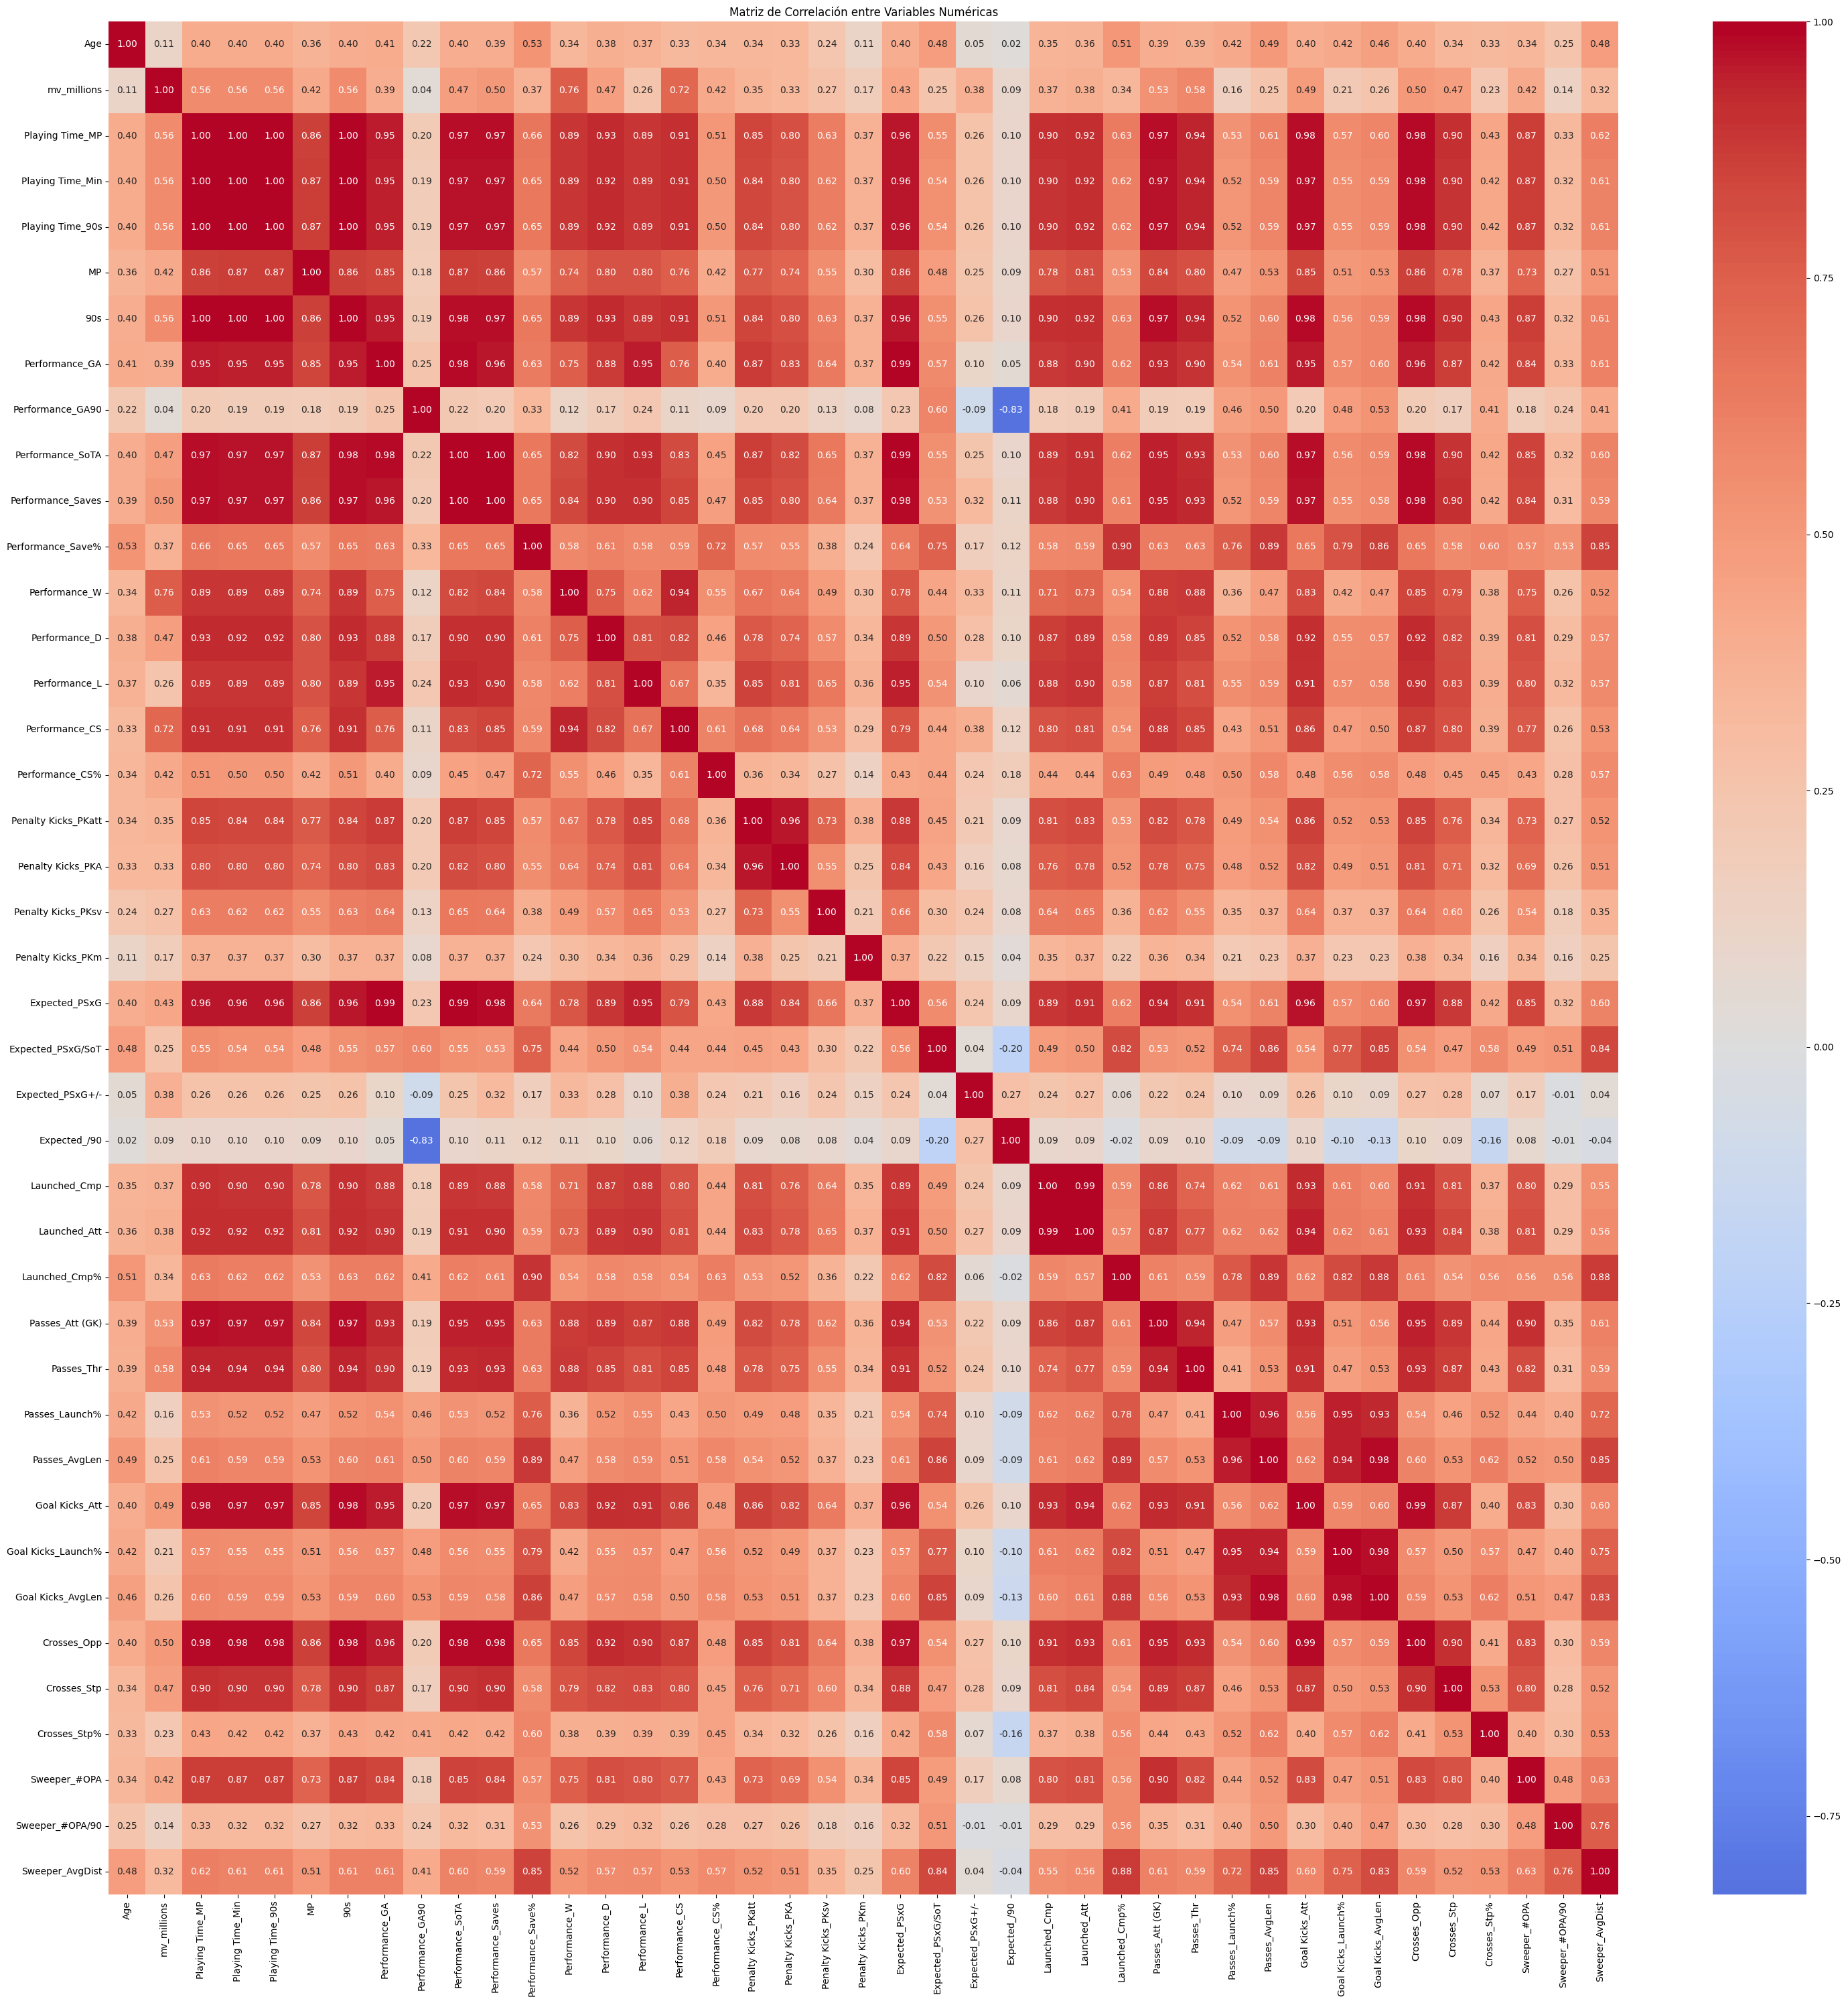

In [45]:
# Seleccionamos solo las columnas numéricas
numerical_cols = df_porteros_clean.select_dtypes(include='number')

# Calculamos la matriz de correlación
corr_matrix = numerical_cols.corr()

# Correlaciones respecto a la variable objetivo
target_corr = corr_matrix["mv_millions"].sort_values(ascending=False)
print("📊 Correlaciones con 'mv_millions':\n")
print(target_corr)

# Heatmap general (centrado en 'mv_millions')
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", center=0)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.tight_layout()
plt.show()


In [ ]:
# Recalcular matriz de correlación
corr_matrix = df_porteros_clean.select_dtypes(include='number').corr()

# Ordenamos por correlación absoluta con la variable objetivo
corr_target = corr_matrix["mv_millions"].drop("mv_millions")
corr_sorted = corr_target.abs().sort_values(ascending=False)

# Mostrar top correlaciones positivas y negativas
top_n = 45
top_pos = corr_target[corr_target > 0].sort_values(ascending=False).head(top_n)
top_neg = corr_target[corr_target < 0].sort_values().head(top_n)

print("🔝 Correlaciones más POSITIVAS con mv_millions:\n", top_pos)
print("\n🔻 Correlaciones más NEGATIVAS con mv_millions:\n", top_neg)


🔝 Correlaciones más POSITIVAS con mv_millions:
 Performance_W          0.759245
Performance_CS         0.717394
Passes_Thr             0.581361
90s                    0.563958
Playing Time_MP        0.563095
Playing Time_90s       0.562352
Playing Time_Min       0.562335
Passes_Att (GK)        0.534415
Performance_Saves      0.504612
Crosses_Opp            0.499976
Goal Kicks_Att         0.493056
Performance_SoTA       0.471227
Crosses_Stp            0.467061
Performance_D          0.466386
Expected_PSxG          0.430925
Performance_CS%        0.420593
MP                     0.419238
Sweeper_#OPA           0.418598
Performance_GA         0.389557
Launched_Att           0.380276
Expected_PSxG+/-       0.378873
Launched_Cmp           0.371435
Performance_Save%      0.368979
Penalty Kicks_PKatt    0.354525
Launched_Cmp%          0.343113
Name: mv_millions, dtype: float64

🔻 Correlaciones más NEGATIVAS con mv_millions:
 Series([], Name: mv_millions, dtype: float64)


C:\Users\jorgi\AppData\Local\Temp\ipykernel_26248\2245562988.py:14: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\jorgi\Desktop\Proyecto\Transfer_Genius\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


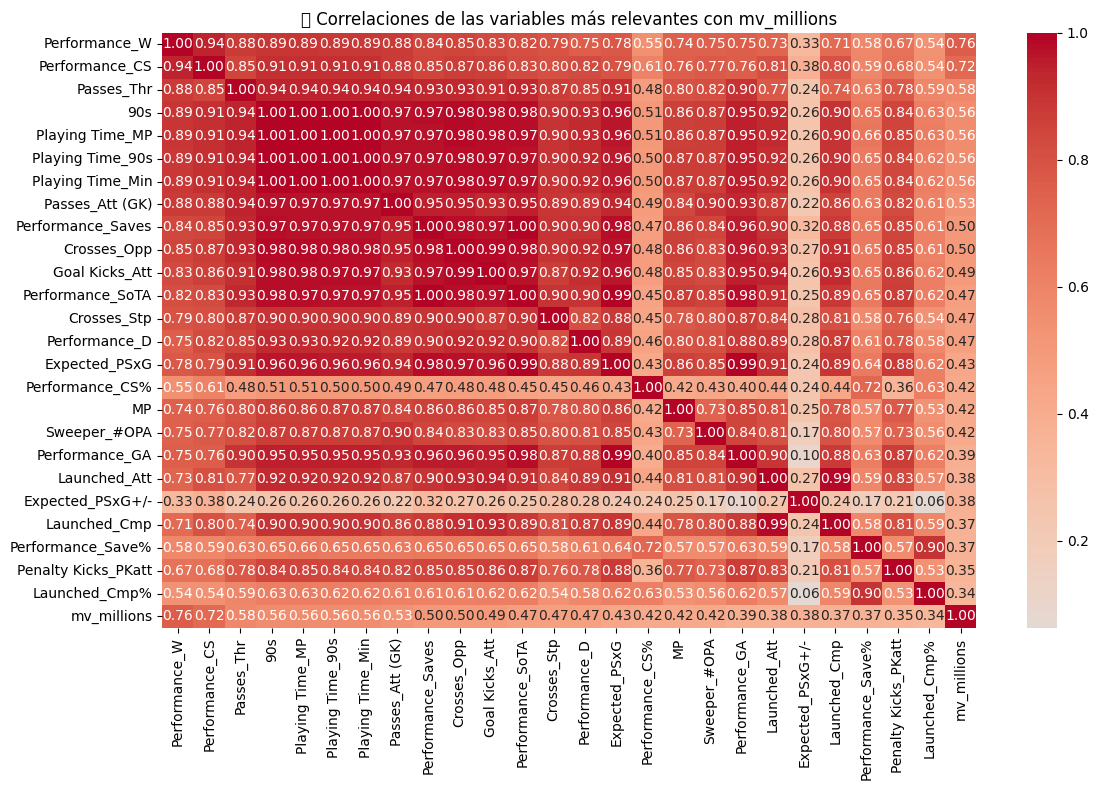

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables más relevantes (positivas y negativas)
top_features = pd.concat([top_pos, top_neg]).index.tolist()

# Subset del dataframe
corr_top = df_porteros_clean[top_features + ["mv_millions"]].corr()

# Heatmap con solo las variables más correlacionadas
plt.figure(figsize=(12, 8))
sns.heatmap(corr_top, annot=True, cmap="coolwarm", fmt=".2f", center=0)
plt.title("🔍 Correlaciones de las variables más relevantes con mv_millions")
plt.tight_layout()
plt.show()
